In [24]:
# data loading

from __future__ import print_function, division
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, transform
import os

camera_path = '/export/jupyterlab/data/udacity-challenge-2/Ch2_002_export_png/camera.csv'
camera_csv = pd.read_csv(camera_path)
path_prefix = '/export/jupyterlab/data/udacity-challenge-2/Ch2_002_export_png/'

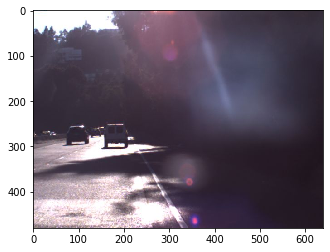

In [34]:
# try to read an image

def show_image(image):
    plt.imshow(image)

plt.figure()
show_image(io.imread(os.path.join(path_prefix, camera_csv['filename'][100])))

In [29]:
# defining our own Dataset class

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

class UdacityDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.camera_csv = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.camera_csv)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        path = os.path.join(self.root_dir, self.camera_csv['filename'][idx])
        image = io.imread(path)
        timestamp = self.camera_csv['timestamp'][idx]
        frame_id = self.camera_csv['frame_id'][idx]
        
        sample = {'image': image,
                  'timestamp': timestamp,
                  'frame_id': frame_id}
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample

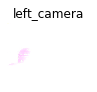

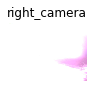

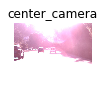

In [40]:
# test the UdacityDataset class

def show_sample(sample):
    plt.imshow(sample['image'])
    plt.title(sample['frame_id'])

udacity_dataset = UdacityDataset(csv_file='/export/jupyterlab/data/udacity-challenge-2/Ch2_002_export/camera.csv',
                                 root_dir='/export/jupyterlab/data/udacity-challenge-2/Ch2_002_export/')

fig = plt.figure()

for i in range(3):
    sample = udacity_dataset[i]
    ax = plt.subplot(1, 4, i%4+1)
    plt.tight_layout()
    ax.axis('off')
    show_sample(sample)
    plt.pause(0.001)
    
    if i % 4 == 0:
        plt.show()